<a href="https://colab.research.google.com/github/subhadeep-123/Fashion---MNIST/blob/master/Fashion_MNIST_using_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing The Packages
import torch
from torch import optim
from torch import nn
import torch.nn.functional as F
import torchvision.datasets as dataset
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import helper
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
#Normalizing The Dataset
transformed = transforms.Compose([transforms.ToTensor(),
                             transforms.Normalize((0.5,),
                                                  (0.5,))]
                                )

#Downloading The Trainset
trainset = dataset.FashionMNIST('FMNIST',
                                download = True,
                                train = True,
                                transform = transformed)

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size = 64,
                                          shuffle = True)

#Downloading The TestSet
testset = dataset.FashionMNIST('FMNST',
                               download = True,
                               train = False,
                               transform = transformed)

testloader =  torch.utils.data.DataLoader(testset,
                                         batch_size = 64,
                                         shuffle = True)

0it [00:00, ?it/s]

26427392it [00:02, 10234677.58it/s]                             


Extracting FMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 71877.97it/s]                            
0it [00:00, ?it/s]

Extracting FMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz


4423680it [00:01, 2994504.08it/s]                            
0it [00:00, ?it/s]

Extracting FMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 25448.40it/s]            
0it [00:00, ?it/s]

Extracting FMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


26427392it [00:02, 10569445.84it/s]                             


Extracting FMNST/FashionMNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 71543.48it/s]                            
0it [00:00, ?it/s]

Extracting FMNST/FashionMNIST/raw/train-labels-idx1-ubyte.gz


4423680it [00:01, 3039353.91it/s]                            
0it [00:00, ?it/s]

Extracting FMNST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 25443.74it/s]            

Extracting FMNST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [5]:
#Spliting The Dataset
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


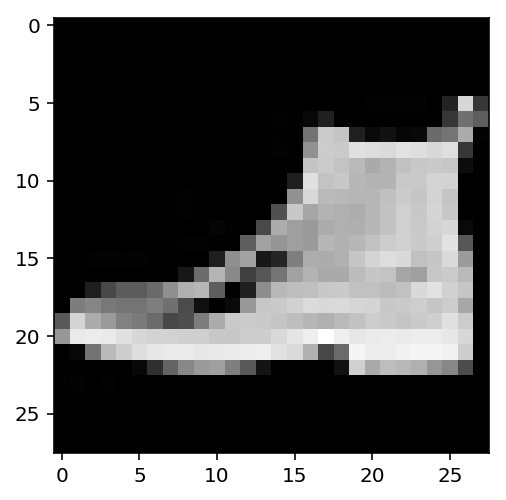

In [6]:
#Plotting a Visualization
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

In [0]:
#Defining The Networks Architecture
class Neural_Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64, 10)
      
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.log_softmax(self.fc4(x), dim = 1)
    
    return x

In [8]:
model = Neural_Network()
model

Neural_Network(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [0]:
#Initializing Loss and Optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [10]:
#Training The Network
epoch = 10

for x in range(epoch):
  running_loss = 0
  for images, labels in trainloader:
    
    #Flattening The Image
    images = images.view(images.shape[0], -1)
    
    #Clearing Previous Gradients
    optimizer.zero_grad()
    
    #-> Forward Pass 
    #-> Calculating Loss 
    #-> Calculating Gradients Through Backward Pass
    #-> Updating the Weights, using optimizer.step()
    
    output = model(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
    
  else:
    print(f"Training Loss: {running_loss/len(trainloader)}")

Training Loss: 0.5204534331110241
Training Loss: 0.3785384125880468
Training Loss: 0.34017511116447985
Training Loss: 0.316222638630473
Training Loss: 0.2962614207713207
Training Loss: 0.27769298096106
Training Loss: 0.26404899967186996
Training Loss: 0.24892698976594502
Training Loss: 0.24067255668739265
Training Loss: 0.22826236376820852


In [0]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

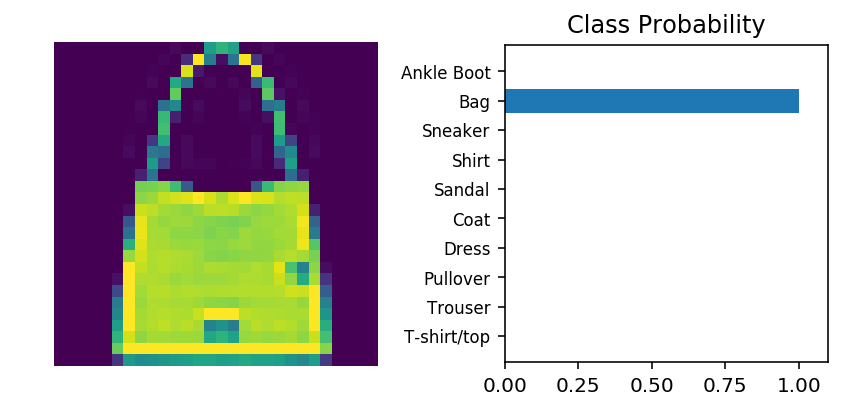

In [12]:
#Checking our model

images, labels = next(iter(trainloader))

img = images[2].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = torch.exp(logps)
view_classify(img, ps, version='Fashion')